# ESG

---

## http://esgcompare.org/

https://www.kaggle.com/datasets/alistairking/public-company-esg-ratings-dataset

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import time
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress


# Import any API key
#from api_keys import weather_api_key


# Study data files
esg_data_path = "data.csv"


# Reading the mouse data and the study results
esg_data = pd.read_csv(esg_data_path)


# Displaying the data table for preview
esg_data.head()

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258


In [40]:
top_companies = esg_data.sort_values("total_score", ascending=False)
top_companies.head(10)

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
452,cop,Conocophillips,USD,"NEW YORK STOCK EXCHANGE, INC.",Energy,https://static.finnhub.io/logo/aacfcb5e-80eb-1...,http://www.conocophillips.com/,AA,Excellent,A,...,BB,Medium,687,544,305,1536,16-04-2022,A,High,1163165
176,msft,Microsoft Corp,USD,NASDAQ NMS - GLOBAL MARKET,Technology,https://static.finnhub.io/logo/25e313016e9fac0...,https://www.microsoft.com/en-us,AA,Excellent,BBB,...,BB,Medium,715,443,375,1533,27-04-2022,A,High,789019
302,eix,Edison International,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/cbccd574-80eb-1...,https://www.edison.com/,AA,Excellent,A,...,BB,Medium,700,513,315,1528,17-04-2022,A,High,827052
18,abnb,Airbnb Inc,USD,NASDAQ NMS - GLOBAL MARKET,Hotels Restaurants and Leisure,https://static2.finnhub.io/file/publicdatany/f...,https://www.airbnb.co.in/,A,High,A,...,BBB,High,505,570,400,1475,10-06-2022,A,High,1559720
250,apd,Air Products and Chemicals Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Chemicals,https://static.finnhub.io/logo/74581b6e-80eb-1...,https://www.airproducts.com/,AA,Excellent,BBB,...,BB,Medium,700,442,300,1442,16-04-2022,A,High,2969
137,amzn,Amazon.com Inc,USD,NASDAQ NMS - GLOBAL MARKET,Retail,https://static.finnhub.io/logo/967bf7b0-80df-1...,https://www.amazon.com/,AA,Excellent,BB,...,BBB,High,668,305,460,1433,16-04-2022,A,High,1018724
487,nem,Newmont Corporation,USD,"NEW YORK STOCK EXCHANGE, INC.",Metals and Mining,https://static.finnhub.io/logo/39e32600-80ec-1...,https://newmont.com/,AA,Excellent,BB,...,BB,Medium,675,389,355,1419,18-04-2022,A,High,1164727
195,pep,PepsiCo Inc,USD,NASDAQ NMS - GLOBAL MARKET,Beverages,https://static2.finnhub.io/file/publicdatany/f...,https://www.pepsico.com/,AA,Excellent,BB,...,BB,Medium,719,340,358,1417,18-04-2022,A,High,77476
494,exc,Exelon Corp,USD,NASDAQ NMS - GLOBAL MARKET,Utilities,https://static.finnhub.io/logo/d63a05d0-80eb-1...,https://www.exeloncorp.com/,AA,Excellent,BBB,...,BB,Medium,694,403,316,1413,17-04-2022,A,High,1109357
372,pxd,Pioneer Natural Resources Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Energy,https://static.finnhub.io/logo/5d0d741c-80ec-1...,https://www.pxd.com/,AA,Excellent,BBB,...,BB,Medium,700,412,300,1412,18-04-2022,A,High,1038357


In [41]:
bottom_companies = esg_data.sort_values("total_score", ascending=True)
bottom_companies.head(10)

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
655,pola,Polar Power Inc,USD,NASDAQ NMS - GLOBAL MARKET,Electrical Equipment,https://static.finnhub.io/logo/09caf854-81d9-1...,https://polarpower.com/,B,Medium,B,...,B,Medium,200,200,200,600,05-06-2022,B,Medium,1622345
704,gva,Granite Construction Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Construction,https://static.finnhub.io/logo/f0d5c3ba-80eb-1...,https://www.graniteconstruction.com/,B,Medium,B,...,B,Medium,200,200,200,600,07-11-2022,B,Medium,861459
228,zion,Zions Bancorporation NA,USD,NASDAQ NMS - GLOBAL MARKET,Banking,https://static.finnhub.io/logo/1ab22e6c-80e1-1...,https://www.zionsbank.com/,B,Medium,B,...,B,Medium,200,200,200,600,20-04-2022,B,Medium,109380
76,afaq,AF Acquisition Corp,USD,NASDAQ NMS - GLOBAL MARKET,NaN,NaN,NaN,B,Medium,B,...,B,Medium,200,200,200,600,21-06-2022,B,Medium,1841661
303,glw,Corning Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Electrical Equipment,https://static.finnhub.io/logo/ec2c31c6-80eb-1...,https://www.corning.com/,B,Medium,B,...,B,Medium,200,200,200,600,16-04-2022,B,Medium,24741
395,tel,TE Connectivity Ltd,USD,"NEW YORK STOCK EXCHANGE, INC.",Electrical Equipment,https://static.finnhub.io/logo/81c63b2c-80ec-1...,https://www.te.com/,B,Medium,B,...,B,Medium,200,200,200,600,19-04-2022,B,Medium,1385157
396,tfx,Teleflex Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Health Care,https://static4.finnhub.io/file/publicdatany2/...,https://www.teleflex.com/,B,Medium,B,...,B,Medium,200,200,200,600,19-04-2022,B,Medium,96943
595,xl,XL Fleet Corp,USD,"NEW YORK STOCK EXCHANGE, INC.",Auto Components,https://static.finnhub.io/logo/c558526758aff6a...,https://xlfleet.com/,B,Medium,B,...,B,Medium,200,200,200,600,22-04-2022,B,Medium,1772720
72,aese,Allied Esports Entertainment Inc,USD,NASDAQ NMS - GLOBAL MARKET,Hotels Restaurants and Leisure,https://static.finnhub.io/logo/60068062-80db-1...,https://ir.alliedesportsent.com/,B,Medium,B,...,B,Medium,200,200,200,600,10-06-2022,B,Medium,1708341
313,ko,Coca-Cola Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Beverages,https://static.finnhub.io/logo/12f0377a-80ec-1...,https://www.coca-colacompany.com/,B,Medium,B,...,B,Medium,200,201,200,601,16-04-2022,B,Medium,21344


In [6]:
esg_data.count()


ticker                  722
name                    722
currency                722
exchange                722
industry                709
logo                    702
weburl                  706
environment_grade       722
environment_level       722
social_grade            722
social_level            722
governance_grade        722
governance_level        722
environment_score       722
social_score            722
governance_score        722
total_score             722
last_processing_date    722
total_grade             722
total_level             722
cik                     722
dtype: int64

In [7]:
esg_data.nunique()

ticker                  722
name                    722
currency                  5
exchange                  2
industry                 47
logo                    702
weburl                  706
environment_grade         5
environment_level         3
social_grade              6
social_level              4
governance_grade          4
governance_level          3
environment_score       197
social_score            186
governance_score         80
total_score             441
last_processing_date     30
total_grade               4
total_level               2
cik                     722
dtype: int64

In [17]:

esg_industry_agg = esg_data.groupby(["industry"])["total_score"].agg(("mean", "median", "var", "std", "sem"))
esg_industry_counts = esg_data.groupby(["industry"])["total_score"].value_counts()
esg_industry_agg["# of companies"] = esg_data.groupby(["industry"])["total_score"].count()
esg_industry_agg

,mean,median,var,std,sem,# of companies
industry,,,,,,
Aerospace & Defense,633.000000,633.0,NaN,NaN,NaN,1
Aerospace and Defense,1089.700000,1136.0,24886.011111,157.753007,49.885881,10
Airlines,838.714286,746.0,36032.904762,189.823351,71.746483,7
Auto Components,833.333333,696.0,105349.333333,324.575620,187.393822,3
Automobiles,859.250000,873.0,42856.250000,207.017511,103.508756,4
Banking,898.310345,886.0,33559.507389,183.192542,34.018001,29
Beverages,1061.000000,1113.0,115992.000000,340.575983,170.287991,4
Biotechnology,866.910714,822.5,31003.610065,176.078420,23.529469,56
Building,1074.200000,1123.5,40144.400000,200.360675,63.359609,10


In [21]:
esg_stats_sorted = esg_industry_agg.sort_values("mean", ascending=False)
esg_stats_sorted

,mean,median,var,std,sem,# of companies
industry,,,,,,
Utilities,1190.633333,1199.5,35381.067816,188.098559,34.341941,30
Tobacco,1165.000000,1165.0,18.000000,4.242641,3.000000,2
Industrial Conglomerates,1157.000000,1141.0,1216.000000,34.871192,20.132892,3
Packaging,1156.000000,1157.0,2290.000000,47.853944,23.926972,4
Energy,1142.263158,1151.0,46887.204678,216.534535,49.676429,19
Food Products,1131.071429,1127.0,9614.994505,98.056078,26.206589,14
Distributors,1109.666667,1120.0,1640.333333,40.501029,23.383280,3
Aerospace and Defense,1089.700000,1136.0,24886.011111,157.753007,49.885881,10
Construction,1082.666667,1187.5,61952.666667,248.902926,101.614194,6


In [45]:
esg_stats_util = esg_data.loc[esg_data['industry'] == 'Utilities',:]
esg_stats_util = esg_stats_util.sort_values('total_score',ascending = False)
esg_stats_util

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
302,eix,Edison International,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/cbccd574-80eb-1...,https://www.edison.com/,AA,Excellent,A,...,BB,Medium,700,513,315,1528,17-04-2022,A,High,827052
494,exc,Exelon Corp,USD,NASDAQ NMS - GLOBAL MARKET,Utilities,https://static.finnhub.io/logo/d63a05d0-80eb-1...,https://www.exeloncorp.com/,AA,Excellent,BBB,...,BB,Medium,694,403,316,1413,17-04-2022,A,High,1109357
363,pnw,Pinnacle West Capital Corp,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/58db7dc2-80ec-1...,https://www.pinnaclewest.com/,AA,Excellent,BBB,...,BB,Medium,629,479,300,1408,18-04-2022,A,High,764622
389,sre,Sempra Energy,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/761f51b8-80ec-1...,https://www.sempra.com/,AA,Excellent,BB,...,BB,Medium,700,386,310,1396,19-04-2022,A,High,1032208
421,wec,WEC Energy Group Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/9ed91c64-80ec-1...,https://www.wecenergygroup.com/,AA,Excellent,BBB,...,BB,Medium,635,438,300,1373,19-04-2022,A,High,783325
309,ed,Consolidated Edison Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/24f921dc-8279-1...,https://www.conedison.com/,AA,Excellent,BB,...,BB,Medium,700,358,300,1358,16-04-2022,A,High,1047862
255,awk,American Water Works Company Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/7abeb7a8-80eb-1...,https://www.amwater.com/,AA,Excellent,BB,...,BB,Medium,653,395,300,1348,16-04-2022,A,High,1410636
515,etr,Entergy Corp,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/d3a911b0-80eb-1...,https://www.entergy.com/,AA,Excellent,BB,...,BB,Medium,653,380,310,1343,17-04-2022,A,High,65984
512,es,Eversource Energy,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/41cde1b6-80ec-1...,https://www.eversource.com/,A,High,BBB,...,BB,Medium,576,409,310,1295,17-04-2022,A,High,72741
295,duk,Duke Energy Corp,USD,"NEW YORK STOCK EXCHANGE, INC.",Utilities,https://static.finnhub.io/logo/c6386312-80eb-1...,https://www.duke-energy.com/,AA,Excellent,BB,...,BB,Medium,604,362,328,1294,17-04-2022,A,High,1326160


In [33]:
esg_stats_refined = esg_stats_sorted[(esg_stats_sorted["# of companies"]>=3)]
esg_stats_refined.head(10)

,mean,median,var,std,sem,# of companies
industry,,,,,,
Utilities,1190.633333,1199.5,35381.067816,188.098559,34.341941,30
Industrial Conglomerates,1157.000000,1141.0,1216.000000,34.871192,20.132892,3
Packaging,1156.000000,1157.0,2290.000000,47.853944,23.926972,4
Energy,1142.263158,1151.0,46887.204678,216.534535,49.676429,19
Food Products,1131.071429,1127.0,9614.994505,98.056078,26.206589,14
Distributors,1109.666667,1120.0,1640.333333,40.501029,23.383280,3
Aerospace and Defense,1089.700000,1136.0,24886.011111,157.753007,49.885881,10
Construction,1082.666667,1187.5,61952.666667,248.902926,101.614194,6
Road and Rail,1076.333333,1145.5,22391.466667,149.637785,61.089370,6


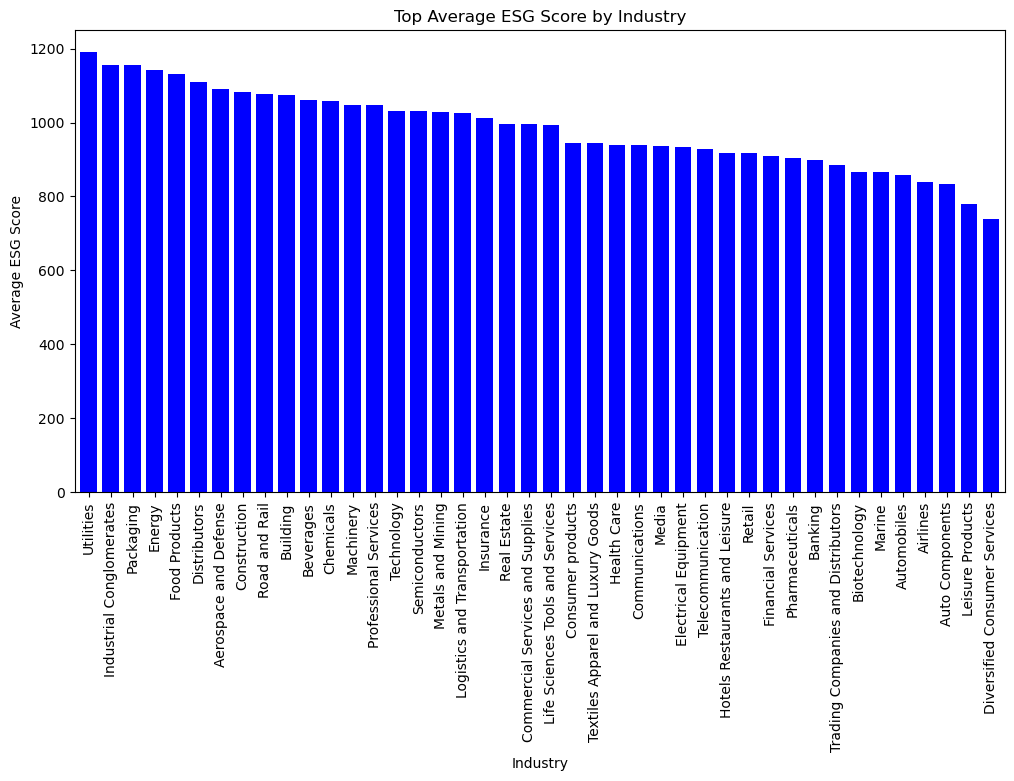

In [37]:
avg_ESG_score_industry = esg_stats_refined["mean"]

avg_esg = Top_avg_ESG_score_industry.plot(kind="bar", facecolor="blue", width=.75,
                                                  title="Top Average ESG Score by Industry",
                                                  figsize=(12,6),
                                                  xlabel="Industry",
                                                  ylabel="Average ESG Score")

In [27]:
bottom_esg_stats = esg_stats_refined.sort_values("mean", ascending=True)

bottom_esg_stats.head(10)


,mean,median,var,std,sem,# of companies
industry,,,,,,
Diversified Consumer Services,739.333333,698.0,24385.333333,156.158040,90.157886,3
Leisure Products,780.000000,827.0,11557.000000,107.503488,62.067168,3
Auto Components,833.333333,696.0,105349.333333,324.575620,187.393822,3
Airlines,838.714286,746.0,36032.904762,189.823351,71.746483,7
Automobiles,859.250000,873.0,42856.250000,207.017511,103.508756,4
Marine,865.333333,950.0,36705.333333,191.586360,110.612437,3
Biotechnology,866.910714,822.5,31003.610065,176.078420,23.529469,56
Trading Companies and Distributors,885.200000,880.0,41049.700000,202.607256,90.608719,5
Banking,898.310345,886.0,33559.507389,183.192542,34.018001,29


In [32]:
industry_counts = esg_data.groupby(["exchange"])["total_score"].count()
industry_counts

exchange
NASDAQ NMS - GLOBAL MARKET       345
NEW YORK STOCK EXCHANGE, INC.    377
Name: total_score, dtype: int64

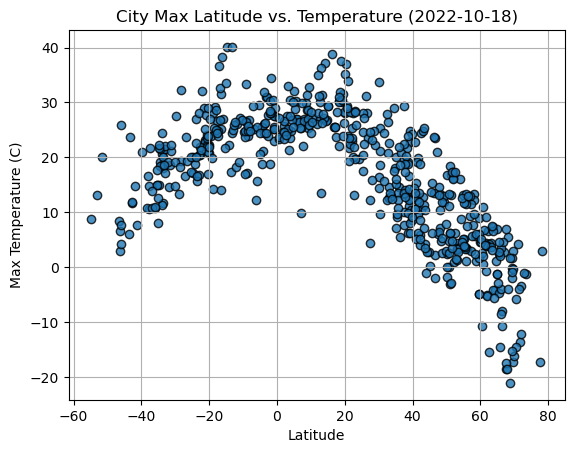

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()